In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
train=pd.read_csv("/kaggle/input/aviakompaniya/train_dataset.csv")
test=pd.read_csv("/kaggle/input/aviakompaniya/test_dataset.csv")
submission=pd.read_csv("/kaggle/input/aviakompaniya/sample_submission.csv")

In [3]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [5]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [6]:
train.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [7]:
train['Arrival Delay in Minutes'].fillna(train['Departure Delay in Minutes'],inplace=True)

# Vizulation

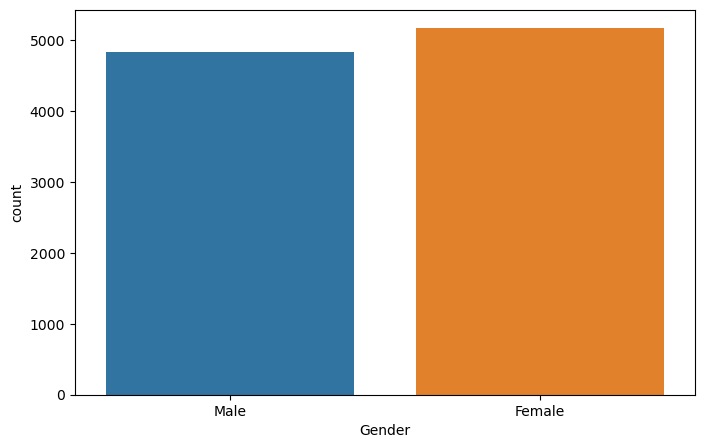

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',data= train)
plt.show()

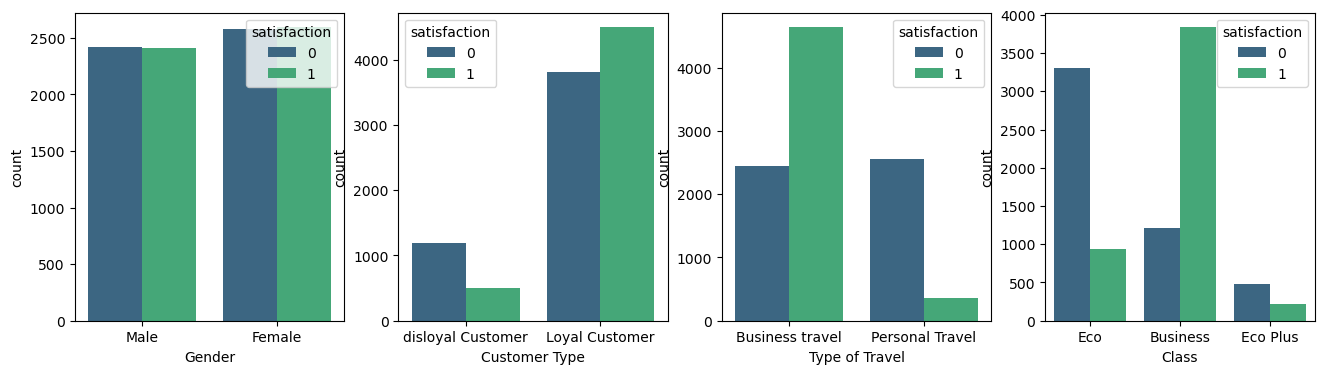

In [9]:

fig, axes = plt.subplots(1,4, figsize=(16,4))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=train, ax=axes[0])

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=train, ax=axes[1])

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=train, ax=axes[2])

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=train, ax=axes[3])

plt.show()

In [10]:
test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [11]:
test['Arrival Delay in Minutes'].fillna(test['Departure Delay in Minutes'],inplace=True)

In [12]:
train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)

/tmp/ipykernel_20/2080983504.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)


satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048134
Departure Delay in Minutes           0.042960
Gate location                        0.007169
id                                   0.002931
dtype: float64

In [13]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [14]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Machine Learning

In [15]:
X=train.drop('satisfaction',axis=1)
y=train['satisfaction']

# Full Pipline

In [16]:
cat_attr=[ 'Gender','Customer Type','Type of Travel', 'Class']
num_attr=[ 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
        'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

full_pip=ColumnTransformer([
    ('num',StandardScaler(),num_attr),
    ('cat',OrdinalEncoder(),cat_attr)
])

In [17]:
x=full_pip.fit_transform(X)

In [18]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=27)

# Logistik Regrission

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       987
           1       0.89      0.83      0.86      1013

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Model aniqligi:, ac_lr=0.8605


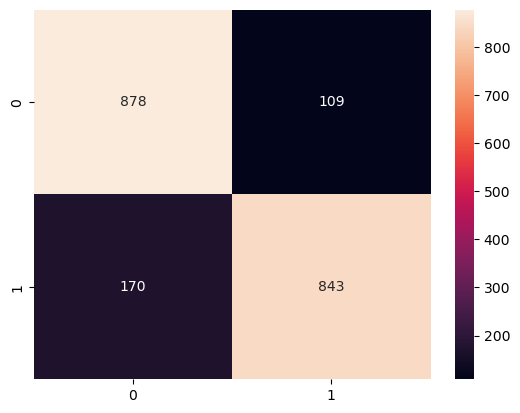

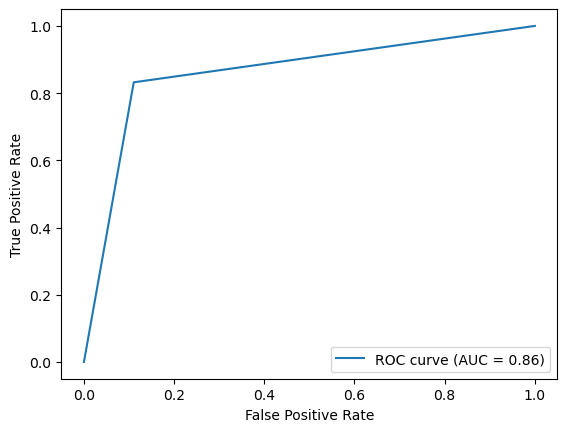

In [19]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(x_val)
print(metrics.classification_report(y_val, y_pred))
ac_lr=metrics.accuracy_score(y_val,y_pred)
print(f"Model aniqligi:, ac_lr={metrics.accuracy_score(y_val,y_pred)}")

## confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


# Random Forest 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       987
           1       0.96      0.93      0.94      1013

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi:, ac_rf=0.9405


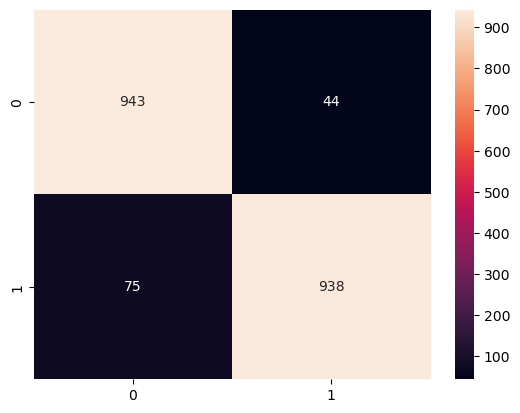

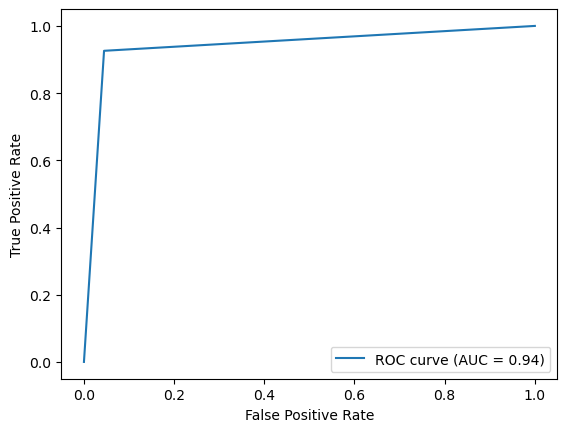

In [20]:
RF_model = RandomForestClassifier(n_estimators=23)
RF_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(x_val)
print(classification_report(y_val, y_pred))
ac_rf=metrics.accuracy_score(y_val,y_pred)
print(f"Model aniqligi:, ac_rf={metrics.accuracy_score(y_val,y_pred)}")

## confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# XGBost

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       987
           1       0.95      0.94      0.94      1013

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi:, ac_xb=0.9425


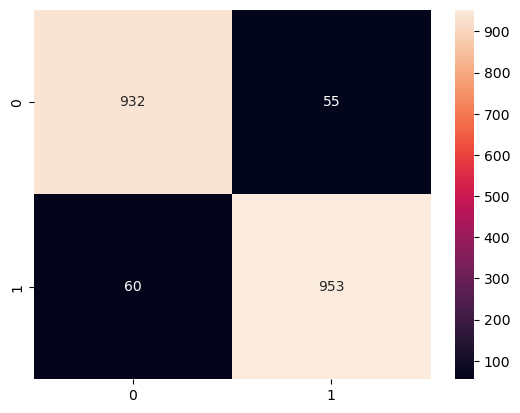

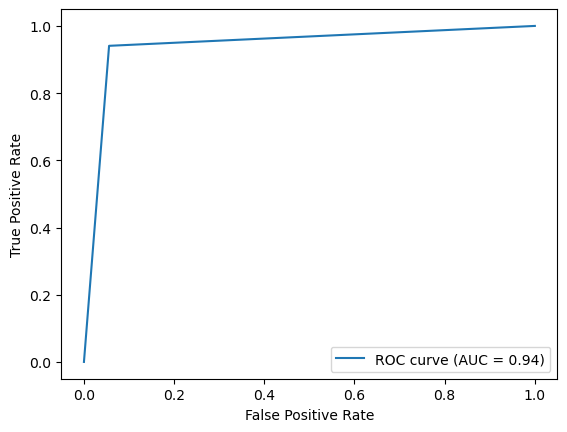

In [21]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)


y_pred = xgb_model.predict(x_val)
print(classification_report(y_val, y_pred))
ac_xb=metrics.accuracy_score(y_val,y_pred)
print(f"Model aniqligi:, ac_xb={metrics.accuracy_score(y_val,y_pred)}")

# confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       987
           1       0.95      0.94      0.94      1013

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi:, ac_dt=0.9425


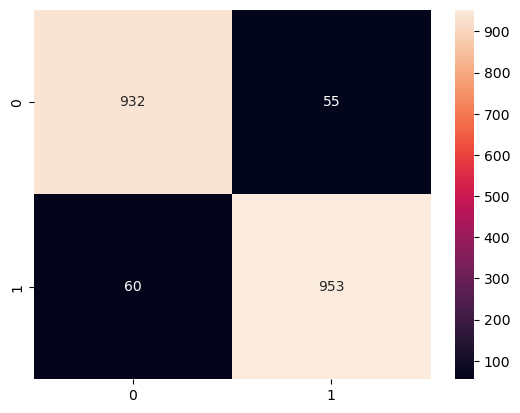

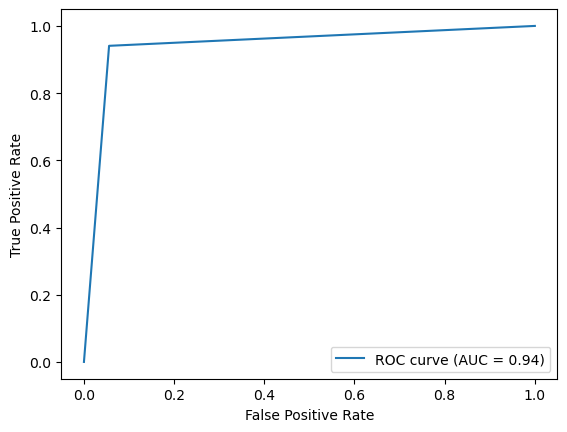

In [22]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_val)
print(classification_report(y_val, y_pred))
ac_dt=accuracy_score(y_val,y_pred)
print(f"Model aniqligi:, ac_dt={accuracy_score(y_val,y_pred)}")

# confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [23]:
x_test=full_pip.fit_transform(test)

# Result

In [24]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBost', 'Decision Tree'],
    
    'Accuracy': [ac_lr, ac_rf, ac_xb, ac_dt]
   
})

results.sort_values(by='Accuracy', ascending=False, inplace=True)
print(results)

                 Model  Accuracy
2               XGBost    0.9425
3        Decision Tree    0.9425
1        Random Forest    0.9405
0  Logistic Regression    0.8605


In [25]:
 test_prediction = xgb_model.predict(x_test)

In [26]:
submission['satisfaction']=test_prediction
submission

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1


In [27]:
submission.to_csv('result_satisfacton1.csv',index=False)